# ベイズ勉強会 Part 4 多次元ガウス分布のベイズ推論
> 多次元ガウス分布のベイズ推論を実践する

- toc: true 
- badges: true
- comments: true
- categories: [bayes]
- image: images/mgauss_ml.gif

ベイズ勉強会資料は『ベイズ推論による機械学習入門』{% fn 1 %}を元に、途中式計算をできるだけ省略せずに解説を行ったものです。

# 多次元ガウス分布

多次元ガウス分布はD次元ベクトル${\bf x} \in \mathbb{R}^D$を生成するための確率分布であり、以下の確率密度関数で表される。

> Important: 多次元ガウス分布の確率密度関数 $$\frac{1}{\sqrt{(2\pi)^D |{\bf \Sigma} }|}\exp{\{-\frac{1}{2}({\bf x}-{\bf \mu})^\mathrm{T} {\bf \Sigma}^{-1} ({\bf x}-{\bf \mu})\} }$$

${\bf \mu} \in \mathbb{R}^D$は平均パラメータ、${\bf \Sigma}$は共分散行列パラメータで$D \times D$の正定値行列である必要がある。

> Important: 正定値行列

>> 固有値が全て正の実正方行列を正定値行列と呼ぶ。実正方行列${\bf A}$が正定値行列である必要十分条件は任意の非ゼロベクトル${\bf x}$に関して、
>>
>> $${\bf x}^\mathrm{T} {\bf A}{\bf x} > 0$$
>>
>> が成り立つこと。正定値行列の逆行列も正定値行列である。また全ての固有値が正であることから、
>>
>> $$|{\bf A}| > 0$$
>>
>> が成り立つ。
>>
>> また、対称行列であるので
>>
>> $${\bf A}^{\mathrm{T} } = {\bf A}$$
>>
>> が成り立つ。

多次元ガウス分布を対数で表示すると、

> Important: 多次元ガウス分布の対数表示 $$\ln \mathcal{N}({\bf x}|{\bf \mu},{\bf \Sigma})=-\frac{1}{2}\{({\bf x}-{\bf \mu})^\mathrm{T} {\bf \Sigma}^{-1}({\bf x}-{\bf \mu}) + \ln |{\bf \Sigma}| + D \ln 2\pi\}$$

1次元ガウス分布と同様に分散の逆元として精度を定義できる。共分散行列$\bf{\Sigma}$の逆行列として精度行列$\bf{\Lambda}$を定義する。すなわち$\bf{\Lambda}=\bf{\Sigma}^{-1}$である。

> Important: 多次元ガウス分布を精度行列で表した場合 $$\frac{1}{\sqrt{(2\pi)^D} }|{\bf \Lambda}|^{\frac{1}{2} }\exp{\{-\frac{1}{2}({\bf x}-{\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}-{\bf \mu})\} }$$

> Important: 多次元ガウス分布の対数表示(精度行列で表した場合) $$\ln \mathcal{N}({\bf x}|{\bf \mu},{\bf \Lambda}^{-1})=-\frac{1}{2}\{({\bf x}-{\bf \mu})^\mathrm{T} {\bf \Lambda}({\bf x}-{\bf \mu}) - \ln |{\bf \Lambda}| + D\ln 2\pi\}$$

この多次元ガウス分布のベイズ推論を行っていく。1次元ガウス分布と同様、平均パラメータ未知、精度パラメータ未知、両方未知の場合の順に行う。なお本稿では特に断り無い限り多次元ガウス分布のことをガウス分布と呼ぶ。

# 平均未知

D次元の確率変数${\bf x} \in \mathbb{R}^D$の平均パラメータ${\bf \mu} \in \mathbb{R}^D$のみが未知で、精度行列${\bf \Lambda} \in \mathbb{R}^{D \times D}$は既に与えられている、またはハイパーパラメータとして、ベイズ推論を行ってみる。N個のデータ${\bf X} = \{ {\bf x}_1,\dots,{\bf x}_N\}$が観測されていて、予測する未知の観測を${\bf x}_*$とおく。

## モデルの構築

平均のみが未知の時は、ガウス分布を事前分布とすることで共役性が満たされることがわかっている。${\bf m} \in \mathbb{R}^D, {\bf \Lambda}_{\mu} \in \mathbb{R}^{D \times D}$をハイパーパラメータとして同時分布は次のようになる。

$$
\begin{eqnarray}
    p({\bf X},{\bf x}_*,{\bf \mu}) &=& p({\bf X}|{\bf \mu})p({\bf x}_*|{\bf \mu})p({\bf \mu}) \\
    p({\bf X}|{\bf \mu}) &=& \Pi_{n=1}^{N} \mathcal{N}({\bf x}_n|{\bf \mu},{\bf \Lambda}^{-1}) \\
    p({\bf x}_*|{\bf \mu}) &=& \mathcal{N}({\bf x}_*|{\bf \mu},{\bf \Lambda}^{-1}) \\
    p({\bf \mu}) &=& \mathcal{N}({\bf \mu}|{\bf m},{\bf \Lambda}_{\mu}^{-1})
\end{eqnarray}
$$

## 事後分布の推論

ベイズの定理を用いて事後分布$p({\bf \mu}|{\bf X})$は次のようになる。

$$
\begin{eqnarray}
    p({\bf \mu}|{\bf X}) &\propto& p({\bf X}|{\bf \mu})p({\bf \mu}) \\
    &=& \{ \Pi_{n=1}^{N} p({\bf x}_n|{\bf \mu})\}p({\bf \mu}) \\
    &=& \Pi_{n=1}^{N} \{\mathcal{N}({\bf x}_n|{\bf \mu},{\bf \Lambda}^{-1})\} \mathcal{N}({\bf \mu}|{\bf m},{\bf \Lambda}_{\mu}^{-1})
\end{eqnarray}
$$

対数をとると

$$
\begin{eqnarray}
    \ln p({\bf \mu}|{\bf X}) &=& \Sigma_{n=1}^{N} \ln \mathcal{N}({\bf x}_n|{\bf \mu},{\bf \Lambda}^{-1}) + \ln \mathcal{N}({\bf \mu}|{\bf m},{\bf \Lambda}_{\mu}^{-1}) + const. \\
    &=& -\frac{1}{2} \Sigma_{n=1}^{N} ({\bf x}_n-{\bf \mu})^\mathrm{T} {\bf \Lambda}({\bf x}_n-{\bf \mu}) - \frac{1}{2}({\bf \mu}-{\bf m})^\mathrm{T}{\bf \Lambda}_{\mu}({\bf \mu}-{\bf m}) + const. \\
    &=& -\frac{1}{2} \Sigma_{n=1}^{N} ({\bf x}_n^{\mathrm{T} }-{\bf \mu}^{\mathrm{T} }){\bf \Lambda}({\bf x}_n-{\bf \mu}) - \frac{1}{2}({\bf \mu}^{\mathrm{T} }-{\bf m}^{\mathrm{T} }) {\bf \Lambda}_{\mu}({\bf \mu}-{\bf m}) + const. \\
    &=& \frac{1}{2}\Sigma_{n=1}^{N}\{ {\bf x}_n^{\mathrm{T} }{\bf \Lambda}{\bf \mu}\} + \frac{1}{2} {\bf \mu}^{\mathrm{T} } {\bf \Lambda}\Sigma_{n=1}^{N} {\bf x}_n - \frac{N}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - \frac{1}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf \mu} + \frac{1}{2}{\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf m} + \frac{1}{2}{\bf m}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf \mu} + const.
\end{eqnarray}
$$

ここで、${\bf x}_n^{\mathrm{T} }{\bf \Lambda}{\bf \mu}$は行数と列数について(1×D)×(D×D)×(D×1)=(1×1)よりスカラーなので次が成り立つ。

$$
\begin{eqnarray}
    {\bf x}_n^{\mathrm{T} }{\bf \Lambda}{\bf \mu} &=& ({\bf x}_n^{\mathrm{T} }{\bf \Lambda}{\bf \mu})^{\mathrm{T} }　(スカラーを転置しても同じ) \\
    &=& {\bf \mu}^{\mathrm{T} } {\bf \Lambda}^{\mathrm{T} } {\bf x}_n　(これは公式通り) \\
    &=& {\bf \mu}^{\mathrm{T} } {\bf \Lambda} {\bf x}_n　({\bf \Lambda}は対称行列)
\end{eqnarray}
$$

${\bf m}^{\mathrm{T} }{\bf \Lambda}_{\mu} {\bf \mu}$についても同様であり、

$$
\begin{eqnarray}
    \ln p({\bf \mu}|{\bf X}) &=& \frac{1}{2}\Sigma_{n=1}^{N}\{ {\bf x}_n^{\mathrm{T} }{\bf \Lambda}{\bf \mu}\} + \frac{1}{2} {\bf \mu}^{\mathrm{T} } {\bf \Lambda}\Sigma_{n=1}^{N} {\bf x}_n - \frac{N}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - \frac{1}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf \mu} + \frac{1}{2}{\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf m} + \frac{1}{2}{\bf m}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf \mu} + const. \\
    &=& \frac{1}{2}{\bf \mu}^{\mathrm{T} } {\bf \Lambda}\Sigma_{n=1}^{N} {\bf x}_n + \frac{1}{2}{\bf \mu}^{\mathrm{T} } {\bf \Lambda}\Sigma_{n=1}^{N} {\bf x}_n - \frac{N}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - \frac{1}{2} {\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf \mu} + \frac{1}{2}{\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf m} + + \frac{1}{2}{\bf \mu}^{\mathrm{T} }{\bf \Lambda}_{\mu}{\bf m} + const. \\
    &=& - \frac{1}{2}\{ {\bf \mu}^{\mathrm{T} } (N {\bf \Lambda}+{\bf \Lambda}_{\mu}){\bf \mu} - 2 {\bf \mu}^{\mathrm{T} }({\bf \Lambda} \Sigma_{n=1}^{N} {\bf x}_n + {\bf \Lambda}_{\mu} {\bf m})\} + const.
\end{eqnarray}
$$

${\bf \mu}$に関する上に凸の二次関数となり、ガウス分布であることがわかる。1次元と同様に逆算的に計算していく。

$$p({\bf \mu}|{\bf X}) = \mathcal{N}({\bf \mu}|\hat{\bf m},\hat{\bf \Lambda}_{\bf \mu}^{-1})$$

とおき、対数をとって${\bf \mu}$について整理すると

$$
\begin{eqnarray}
    \ln p({\bf \mu}|{\bf X}) &=& -\frac{1}{2}\{({\bf \mu}-\hat{\bf m})^\mathrm{T} \hat{\bf \Lambda}_{\bf \mu} ({\bf \mu}-\hat{\bf m}) \} + const. \\
    &=& -\frac{1}{2} \{ {\bf \mu}^{\mathrm{T} } \hat{\bf \Lambda}_{\bf \mu} {\bf \mu} - \hat{\bf m}^{\mathrm{T} } \hat{\bf \Lambda}_{\bf \mu} {\bf \mu} - {\bf \mu}^{\mathrm{T} } \hat{\bf \Lambda}_{\bf \mu} \hat{\bf m} \} + const. \\
    &=& -\frac{1}{2} \{ {\bf \mu}^{\mathrm{T} } \hat{\bf \Lambda}_{\bf \mu} {\bf \mu}-2{\bf \mu}^{\mathrm{T} } \hat{\bf \Lambda}_{\bf \mu} \hat{\bf m} \} + const.
\end{eqnarray}
$$

対応関係を見れば

$$
\begin{eqnarray}
    \hat{\bf \Lambda}_{\bf \mu} = N{\bf \Lambda}+{\bf \Lambda}_{\bf \mu} \\
    \hat{\bf m} = \hat{\bf \Lambda}_{\bf \mu}^{-1}({\bf \Lambda} \Sigma_{n=1}^{N} {\bf x}_n + {\bf \Lambda}_{\mu} {\bf m})
\end{eqnarray}
$$

と事後分布のハイパーパラメータが求まる。

## 予測分布の導出

簡単のために学習前の事前分布を用いて予測分布を導出し、更新されたハイパーパラメータを代入することで学習後の予測分布を計算する。1次元の時と同様、ベイズの定理と対数化を利用し積分計算を避ける。

$$\ln p({\bf x}_*) = \ln p({\bf x}_*|{\bf \mu}) - \ln p({\bf \mu}|{\bf x}_*) + const.$$

$\ln p({\bf \mu}|{\bf x}_*)$は${\bf x}_*$を学習した後の事後分布と見なせるので、

$$
\begin{eqnarray}
    p({\bf \mu}|{\bf x}_*) &=& \mathcal{N}({\bf \mu}|{\bf m}({\bf x}_*), ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}) \\
    ただし　{\bf m}({\bf x}_*) &=& ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1} ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu} {\bf m})
\end{eqnarray}
$$

したがって、

$$
\begin{eqnarray}
    \ln p({\bf x}_*) &=& \ln p({\bf x}_*|{\bf \mu}) - \ln p({\bf \mu}|{\bf x}_*) + const. \\
    &=& -\frac{({\bf x}_*-{\bf \mu})^\mathrm{T}{\bf \Lambda}({\bf x}_*-{\bf \mu})}{2} + \frac{({\bf \mu}-{\bf m}({\bf x}_*))^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\mu})({\bf \mu}-{\bf m}({\bf x}_*))}{2} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - {\bf \mu}^\mathrm{T}{\bf \Lambda}{\bf x}_* - {\bf m}({\bf x}_*)^\mathrm{T} ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu}) {\bf m}({\bf x}_*) + {\bf m}({\bf x}_*)^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu}){\bf \mu} + {\bf \mu}^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu}){\bf m}({\bf x}_*) \} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - 2 {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - {\bf m}({\bf x}_*)^\mathrm{T} ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu}) {\bf m}({\bf x}_*) + 2 {\bf \mu}^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu}){\bf m}({\bf x}_*)\} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - 2 {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf \mu} - {\bf m}({\bf x}_*)^\mathrm{T} ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu}{\bf m}) + 2{\bf \mu}^\mathrm{T}{\bf \Lambda}{\bf x}_*\} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu}{\bf m})^\mathrm{T} {\bf m}({\bf x}_*) \} + const.　({\bf m}({\bf x}_*)^\mathrm{T} ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu}{\bf m})はスカラーなので転置しても変わらない) \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu}{\bf m})^\mathrm{T} ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1} ({\bf \Lambda}{\bf x}_* + {\bf \Lambda}_{\bf \mu}{\bf m}) \} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - ({\bf \Lambda}{\bf x}_*)^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}{\bf x}_* - ({\bf \Lambda}{\bf x}_*)^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}_{\bf \mu}{\bf m} - ({\bf \Lambda}_{\bf \mu}{\bf m})^\mathrm{T}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}{\bf x}_*\} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} }{\bf \Lambda}{\bf x}_* - {\bf x}_*^\mathrm{T}{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}{\bf x}_* - 2{\bf x}_*^\mathrm{T}{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}_{\bf \mu}{\bf m} \} + const. \\
    &=& -\frac{1}{2}\{ {\bf x}_*^{\mathrm{T} } ({\bf \Lambda}-{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}) {\bf x}_* - 2{\bf x}_*^\mathrm{T}{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}_{\bf \mu}{\bf m} \} + const.
\end{eqnarray}
$$

ここで

$$
p({\bf x}_*) = \mathcal{N}({\bf x}_*|{\bf \mu}_*,{\bf \Lambda}_*^{-1})
$$

と書けるとすると

$$
\ln p({\bf x}_*) = -\frac{1}{2} \{ {\bf x}_*^{\mathrm{T} } {\bf \Lambda}_{*} {\bf x}_* -2{\bf x}_*^{\mathrm{T} } {\bf \Lambda}_{*} {\bf \mu}_*\} + const.
$$

であるから、対応関係から

$$
\begin{eqnarray}
    {\bf \Lambda}_* &=& {\bf \Lambda}-{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda} \\
    {\bf \mu}_* &=& {\bf \Lambda}_*^{-1} {\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}_{\bf \mu}{\bf m}
\end{eqnarray}
$$

ウッドベリーの公式を使うことで更に簡潔な形にできる。

> Tip: ウッドベリーの公式 $$({\bf A}+{\bf U}{\bf B}{\bf V})^{-1} = {\bf A}^{-1} - {\bf A}^{-1}{\bf U}({\bf B}^{-1}+{\bf V}{\bf A}^{-1}{\bf U})^{-1}{\bf V}{\bf A}^{-1}$$

> Tip: ウッドベリーの公式(${\bf A},{\bf B}$の次元が等しく, ${\bf U},{\bf V}$が単位行列の場合) $$({\bf A}+{\bf B})^{-1} = {\bf A}^{-1} - {\bf A}^{-1}({\bf A}^{-1} + {\bf B}^{-1})^{-1} {\bf A}^{-1}$$

${\bf \Lambda}_*$について、${\bf A}={\bf \Lambda}^{-1},{\bf B}={\bf \Lambda}_{\bf \mu}^{-1}$とおくと、

$$
\begin{eqnarray}
    {\bf \Lambda}_* &=& {\bf \Lambda}-{\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda} \\
    &=& {\bf A}^{-1} - {\bf A}^{-1}({\bf A}^{-1} + {\bf B}^{-1})^{-1} {\bf A}^{-1} \\
    &=& ({\bf A}+{\bf B})^{-1} \\
    &=& ({\bf \Lambda}^{-1} + {\bf \Lambda}_{\mu}^{-1})^{-1}
\end{eqnarray}
$$

${\bf \mu}_*$は、${\bf \Lambda}_* = {\bf \Lambda}-{\bf \Lambda} ({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1} {\bf \Lambda}$より

$$
\begin{eqnarray}
    {\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda} &=& {\bf \Lambda} - {\bf \Lambda}_* \\
    {\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1} &=& ({\bf \Lambda} - {\bf \Lambda}_*){\bf \Lambda}^{-1}
\end{eqnarray}
$$

だから

$$
\begin{eqnarray}
    {\bf \mu}_* &=& {\bf \Lambda}_*^{-1} {\bf \Lambda}({\bf \Lambda}+{\bf \Lambda}_{\bf \mu})^{-1}{\bf \Lambda}_{\bf \mu}{\bf m} \\
    &=& {\bf \Lambda}_*^{-1} ({\bf \Lambda} - {\bf \Lambda}_*){\bf \Lambda}^{-1}{\bf \Lambda}_{\bf \mu}{\bf m} \\
    &=& \{ {\bf \Lambda}_*^{-1}{\bf \Lambda}{\bf \Lambda}^{-1}{\bf \Lambda}_{\bf \mu} - {\bf \Lambda}_*^{-1}{\bf \Lambda}_* {\bf \Lambda}^{-1}{\bf \Lambda}_{\bf \mu} \}{\bf m} \\
    &=& \{ {\bf \Lambda}_*^{-1}{\bf \Lambda}_{\bf \mu} -  {\bf \Lambda}^{-1}{\bf \Lambda}_{\bf \mu} \}{\bf m} \\
    &=& \{ ({\bf \Lambda}^{-1} + {\bf \Lambda}_{\mu}^{-1}){\bf \Lambda}_{\bf \mu} -  {\bf \Lambda}^{-1}{\bf \Lambda}_{\bf \mu}\}{\bf m} \\
    &=& {\bf I}_D {\bf m} = {\bf m}
\end{eqnarray}
$$

まとめると、

$$
\begin{eqnarray}
    {\bf \Lambda}_* &=& ({\bf \Lambda}^{-1} + {\bf \Lambda}_{\mu}^{-1})^{-1} \\
    {\bf \mu}_* &=& {\bf m}
\end{eqnarray}
$$

これらに、更新されたハイパーパラメータ$\hat{\bf m},\hat{\bf \Lambda}_{\bf \mu}$を代入して学習後の予測分布$p({\bf x}_*|{\bf X})$が求まる。

# 精度行列未知

## モデルの構築

多次元ガウス分布の精度行列は正定値行列である必要がある。$D \times D$の正定値行列を生成する確率分布にウィシャート分布がある。

> Important: ウィシャート分布の確率密度関数 $$\mathcal{W}({\bf \Lambda}|\nu,{\bf W}) = C_\mathcal{W} (\nu, {\bf W})|{\bf \Lambda}|^{\frac{\nu-D-1}{2} } exp\{ -\frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda})\}$$

$\nu$は自由度パラメータで、$\nu > D - 1$を満たす必要がある。また、パラメータ${\bf W}$は$D \times D$の正定値行列である。$Tr()$はトレースといい、行列の対角成分の和をとる演算である。ウィシャート分布も対数化することで計算の見通しが良くなる。

> Important: ウィシャート分布の対数化 $$\ln \mathcal{W} ({\bf \Lambda}|\nu,{\bf W}) = \frac{\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda}) + \ln C_\mathcal{W} (\nu, {\bf W})$$

> Important: 対数化された正規化項 $$\ln C_\mathcal{W} (\nu, {\bf W}) = - \frac{\nu}{2} \ln |{\bf W}| - \ln \frac{\nu D}{2} \ln 2 - \frac{D(D-1)}{4} \ln \pi - \Sigma_{d=1}^{D} \ln \Gamma(\frac{\nu+1+d}{2})$$

> Tip: トレースについて成り立つ等式 $$\begin{eqnarray} Tr({\bf A}) &=& Tr({\bf A}^\mathrm{T}) \\ Tr({\bf A} + {\bf B}) &=& Tr({\bf A}) + Tr({\bf B}) \\ Tr({\bf AB}) &=& Tr({\bf BA}) \end{eqnarray}$$

さて、このウィシャート分布を用いてモデルを構築すると次のようになる。

$$
\begin{eqnarray}
    p({\bf X},{\bf x}_*,{\bf \Lambda}) &=& p({\bf X}|{\bf \Lambda})p({\bf x}_*|{\bf \Lambda})p({\bf \Lambda}) \\
    p({\bf x}_*|{\bf \Lambda}) &=& \mathcal{N}({\bf x}_* |{\bf \mu}, {\bf \Lambda}^{-1}) \\
    p({\bf X}|{\bf \Lambda}) &=& \Pi_{n=1}^{N} \mathcal{N}({\bf x}_n |{\bf \mu}, {\bf \Lambda}^{-1}) \\
    p({\bf \Lambda}) &=& \mathcal{W}({\bf \Lambda}|\nu, {\bf W})
\end{eqnarray}
$$

## 事後分布の推論

データ${\bf X}$を観測した後の事後分布は

$$
p({\bf \Lambda}|{\bf X}) \propto p({\bf X}|{\bf \Lambda}) p({\bf \Lambda})
$$

ゆえ対数化すると

$$
\begin{eqnarray}
    \ln p({\bf \Lambda}|{\bf X}) &=& \Sigma_{n=1}^{N} \ln \mathcal{N} ({\bf x}_n|{\bf \mu}, {\bf \Lambda}^{-1}) + \ln \mathcal{W}({\bf \Lambda} |\nu, {\bf W}) + const. \\
    &=& - \frac{1}{2} \{ \Sigma_{n=1}^{N} ({\bf x}_n-{\bf \mu})^\mathrm{T} {\bf \Lambda}({\bf x}_n-{\bf \mu}) -  N \ln |{\bf \Lambda}| \} + \frac{\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda}) + const. \\
    &=& \frac{N+\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} \Sigma_{n=1}^{N} Tr \{ ({\bf x}_n-{\bf \mu})^\mathrm{T} {\bf \Lambda}({\bf x}_n-{\bf \mu}) \} - \frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda}) + const.　(スカラーのトレースをとっても同じ) \\
    &=& \frac{N+\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} \Sigma_{n=1}^{N} Tr \{ ({\bf x}_n-{\bf \mu})({\bf x}_n-{\bf \mu})^\mathrm{T} {\bf \Lambda} \} - \frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda}) + const.　(トレース内では対角成分が同じであれば順番を入れ替えても問題ない) \\
    &=& \frac{N+\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr \left[ \{ \Sigma_{n=1}^{N} ({\bf x}_n-{\bf \mu})({\bf x}_n-{\bf \mu})^\mathrm{T} + {\bf W}^{-1} \} {\bf \Lambda} \right] + const.　(トレースの和は和のトレース)
\end{eqnarray}
$$

ウィシャート分布との対応を見れば、

$$
\begin{eqnarray}
    p({\bf \Lambda}|{\bf X}) &=& \mathcal{W}({\bf \Lambda}|\hat{\nu}, \hat{\bf W}) \\
    ただし　\hat{\bf W}^{-1} &=& \Sigma_{n=1}^{N} ({\bf x}_n - {\bf \mu})({\bf x}_n - {\bf \mu})^\mathrm{T} + {\bf W}^{-1} \\
    \hat{\nu} &=& N + \nu
\end{eqnarray}
$$

となる。

## 予測分布の導出

事前分布と事後分布の形が同じなので、表記がシンプルになるよう学習前のハイパーパラメータで予測分布を計算し、後で代入する。

積分計算を避け、ベイズの定理と対数を利用する。学習前の予測分布$p({\bf x}_*)$は、

$$
\ln p({\bf x}_*) = \ln p({\bf x}_*|{\bf \Lambda}) - \ln p({\bf \Lambda}|{\bf x}_*) + const.
$$

と表せる。事後分布の結果を流用して

$$
\begin{eqnarray}
    p({\bf \Lambda}|{\bf x}_*) &=& \mathcal{W}({\bf \Lambda}|1+\nu , {\bf W}({\bf x}_*)) \\
    ただし　{\bf W} ({\bf x}_*)^{-1} &=& ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} + {\bf W}^{-1}
\end{eqnarray}
$$

よって

$$
\begin{eqnarray}
    \ln p({\bf x}_*) &=& \ln p({\bf x}_*|{\bf \Lambda}) - \ln p({\bf \Lambda}|{\bf x}_*) + const. \\
    &=& -\frac{1}{2} \left[ ({\bf x}_* -{\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}_* -{\bf \mu}) - Tr \{ {\bf W}({\bf x}_*)^{-1}{\bf \Lambda} \} - (\nu + 1) \ln |{\bf W} ({\bf x}_*)| \right] + const.
\end{eqnarray}
$$

行列式、トレースの性質を使いながら計算を進める。

> Tip: 行列式の性質 $$\begin{eqnarray} |c{\bf A}| &=& c^N |{\bf A}| \\ |{\bf A}^\mathrm{T}| &=& |{\bf A}| \\ |{\bf A}{\bf B}| &=& |{\bf A}| |{\bf B}| \\ |{\bf A}^{-1}| &=& |{\bf A}|^{-1} \\ |{\bf I}_N + {\bf C} {\bf D}^\mathrm{T} | &=& |{\bf I}_M + {\bf C}^\mathrm{T} {\bf D}|　(この{\bf C}と{\bf D}はN \times M行列) \end{eqnarray}$$

$$
\begin{eqnarray}
    \ln p({\bf x}_*) &=& -\frac{1}{2} \left[ Tr \{ ({\bf x}_* -{\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}_* -{\bf \mu})) \} - Tr \{ ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} {\bf \Lambda}) \} + (\nu + 1) \ln |{\bf W} ({\bf x}_*)^{-1}| \right] + const. \\
    &=& - \frac{1+\nu}{2} \ln |({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} + {\bf W}^{-1}| + const. \\
    &=& - \frac{1+\nu}{2} \ln |{\bf W}^{-1} \{ {\bf W} ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} + {\bf I}_D \}| + const. \\
    &=& - \frac{1+\nu}{2} \ln |{\bf W}^{-1}| |{\bf I}_D + {\bf W} ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T}| + const. \\
    &=& - \frac{1+\nu}{2} \ln |{\bf I}_D + {\bf W} ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} | + const. \\
    &=& - \frac{1+\nu}{2} \ln |{\bf I}_1 + \{ {\bf W} ({\bf x}_* - {\bf \mu}) \}^\mathrm{T} ({\bf x}_* - {\bf \mu}) | + const.　(D \times 1行列になっている) \\
    &=& - \frac{1+\nu}{2} \ln \{ 1 + ({\bf x}_* - {\bf \mu})^\mathrm{T} {\bf W} ({\bf x}_* - {\bf \mu}) \} + const.
\end{eqnarray}
$$

これは多次元のStudentのt分布になっている。

> Important: 多次元のStudentのt分布: $$St({\bf x} | {\bf \mu}_s , {\bf \Lambda}_s , \nu_s) = \frac{\Gamma(\frac{\nu_s + D}{2})}{\Gamma(\frac{\nu_s}{2})} \frac{|{\bf \Lambda}_s|^{\frac{1}{2} } } {(\pi \nu_s)^{\frac{D}{2} }} \left\{ 1 + \frac{1}{\nu_s} ({\bf x} - {\bf \mu}_s)^\mathrm{T} {\bf \Lambda}_s ({\bf x} - {\bf \mu}_s) \right\}^{- \frac{\nu_s + D}{2} }$$

これを対数化して${\bf x}$に関わる項だけ抜き出すと、

$$
\ln St({\bf x} | {\bf \mu}_s , {\bf \Lambda}_s , \nu_s) = - \frac{\nu_s + D}{2} \ln \left\{ 1 + \frac{1}{\nu_s} ({\bf x} - {\bf \mu}_s)^\mathrm{T} {\bf \Lambda}_s ({\bf x} - {\bf \mu}_s) \right\} + const.
$$

対応を見ると学習前の予測分布$p({\bf x}_*)$は次のように表せる。

$$
\begin{eqnarray}
    p({\bf x}_*) &=& St({\bf x} | {\bf \mu}_s , {\bf \Lambda}_s , \nu_s) \\
    ただし　{\bf \mu}_s &=& {\bf \mu} \\
    {\bf \Lambda}_s &=& (1-D+\nu){\bf W} \\
    \nu_s &=& 1-D+\nu
\end{eqnarray}
$$

学習後の予測分布$p({\bf x}_* | {\bf X})$はこれに更新されたハイパーパラメータを代入することで求まる。

# 平均・精度行列未知

## モデル構築

平均パラメータの事前分布をガウス分布、精度パラメータの事前分布をウィシャート分布と別々に決めてもいいが、ガウス・ウィシャート分布が尤度関数がガウス分布の場合の共役事前分布として知られている。

> Important: ガウス・ウィシャート分布 $$NW({\bf \mu}, {\bf \Lambda}|{\bf m},\beta,\nu,{\bf W}) = \mathcal{N}({\bf \mu}|{\bf m}, (\beta {\bf \Lambda})^{-1}) \mathcal{W} ({\bf \Lambda}|\nu, {\bf W})$$

ガウス・ウィシャート分布を事前分布とした場合のモデルは次のようになる。

$$
\begin{eqnarray}
    p({\bf X},{\bf x}_*,{\bf \mu}, {\bf \Lambda}) &=& p({\bf X}|{\bf \mu}, {\bf \Lambda})p({\bf x}_*|{\bf \mu}, {\bf \Lambda}) p({\bf \mu}) p({\bf \Lambda}) \\
    p({\bf \mu}, {\bf \Lambda}) &=& NW({\bf \mu}, {\bf \Lambda}|{\bf m},\beta,\nu,{\bf W})
\end{eqnarray}
$$

## 事後分布の推論

データ${\bf X}$を観測した後の事後分布を求める。

$$
\begin{eqnarray}
    p({\bf \mu}, {\bf \Lambda}| {\bf X}) &=& \frac{p({\bf X}, {\bf \mu}, {\bf \Lambda})}{p({\bf X})} \\
    &=& \frac{p({\bf \mu}|{\bf \Lambda}, {\bf X}) p({\bf \Lambda}|{\bf X}) p({\bf X}) }{p({\bf X})} \\
    &=& p({\bf \mu}|{\bf \Lambda}, {\bf X}) p({\bf \Lambda}|{\bf X})
\end{eqnarray}
$$

1次元の場合と同様に、平均と精度の事後分布を別々に求めてみる。

### 平均の事後分布

平均未知の場合の事後分布で精度行列を$\beta {\bf \Lambda}$とおくことにより求まる。

$$
\begin{eqnarray}
    p({\bf \mu}|{\bf \Lambda}, {\bf X}) &=& \mathcal{N}({\bf \mu}|\hat{\bf m}, (\hat{\beta} {\bf \Lambda})^{-1}) \\
    ただし　\hat{\beta} &=& N + \beta \\
    \hat{\bf m} &=& \frac{1}{\hat{\beta}}(\Sigma_{n=1}^{N} {\bf x}_n + \beta {\bf m})
\end{eqnarray}
$$

> Note: この部分の式変形 $$\begin{eqnarray} {\bf \Lambda}_{\bf \mu} &=& \beta {\bf \Lambda},　 \hat{\bf \Lambda}_{\bf \mu} = \hat{\beta} {\bf \Lambda}　とおいて平均未知の式を見れば、 \\ \hat{\beta} {\bf \Lambda} &=& N {\bf \Lambda} + \beta {\bf \Lambda}　ゆえ \\ \hat{\beta} &=& N + \beta \\ \hat{\bf m} &=& \frac{1}{\hat{\beta} } \hat{\bf \Lambda}^{-1} ({\bf \Lambda} \Sigma_{n=1}^{N} {\bf x}_n + \beta {\bf \Lambda} {\bf m}) \\ &=& \frac{1}{\hat{\beta} }(\Sigma_{n=1}^{N} {\bf x}_n + \beta {\bf m}) \end{eqnarray}$$

### 精度の事後分布

ベイズの定理より、

$$
p({\bf \mu}, {\bf \Lambda}| {\bf X}) = \frac{p({\bf X}|{\bf \mu}, {\bf \Lambda})p({\bf \mu},{\bf \Lambda})}{p({\bf X})}
$$

が成り立つので、

$$
\begin{eqnarray}
    p({\bf \mu}|{\bf \Lambda}, {\bf X}) p({\bf \Lambda}|{\bf X}) &=& \frac{p({\bf X}|{\bf \mu}, {\bf \Lambda})p({\bf \mu},{\bf \Lambda})}{p({\bf X})} \\
    p({\bf \Lambda}|{\bf X}) &=& \frac{p({\bf X}|{\bf \mu}, {\bf \Lambda})p({\bf \mu},{\bf \Lambda})}{p({\bf X})p({\bf \mu}|{\bf \Lambda}, {\bf X})} \\
    \ln p({\bf \Lambda}|{\bf X}) &=& \ln p({\bf X}|{\bf \mu}, {\bf \Lambda}) + \ln p({\bf \mu},{\bf \Lambda}) - \ln p({\bf \mu}|{\bf \Lambda}, {\bf X}) + const. \\
    &=& \Sigma_{n=1}^{N} \ln \mathcal{N}({\bf x}_n|{\bf \mu}, {\bf \Lambda}^{-1}) + \ln NW({\bf \mu}, {\bf \Lambda}|{\bf m},\beta,\nu,{\bf W}) - \ln \mathcal{N}({\bf \mu}|\hat{\bf m}, (\hat{\beta} {\bf \Lambda})^{-1}) + const. \\
    &=& \Sigma_{n=1}^{N} \ln \mathcal{N}({\bf x}_n|{\bf \mu}, {\bf \Lambda}^{-1}) + \ln \mathcal{N}({\bf \mu}|{\bf m}, (\beta {\bf \Lambda})^{-1}) + \ln \mathcal{W} ({\bf \Lambda}|\nu, {\bf W}) - \ln \mathcal{N}({\bf \mu}|\hat{\bf m}, (\hat{\beta} {\bf \Lambda})^{-1}) + const. \\
    &=& - \frac{1}{2} \{ \Sigma_{n=1}^{N} ({\bf x}_n - {\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}_n - {\bf \mu}) - N \ln |{\bf \Lambda}| \} - \frac{\beta}{2} ({\bf \mu} - {\bf m})^\mathrm{T} {\bf \Lambda} ({\bf \mu} - {\bf m}) + \frac{1}{2} \ln |\beta {\bf \Lambda}| + \frac{\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr({\bf W}^\mathrm{T} {\bf \Lambda}) + \frac{\hat{\beta}}{2} ({\bf \mu} - \hat{\bf m})^\mathrm{T} {\bf \Lambda} ({\bf \mu} - \hat{\bf m}) - \frac{1}{2} \ln |\hat{\beta} {\bf \Lambda}| + const. \\
    &=& - \frac{1}{2} \{ \Sigma_{n=1}^{N} ({\bf x}_n - {\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}_n - {\bf \mu}) - N \ln |{\bf \Lambda}| \} - \frac{\beta}{2} ({\bf \mu} - {\bf m})^\mathrm{T} {\bf \Lambda} ({\bf \mu} - {\bf m}) + \frac{1}{2} \ln |{\bf \Lambda}| + \frac{\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr({\bf W}^{-1} {\bf \Lambda}) + \frac{\hat{\beta}}{2} ({\bf \mu} - \hat{\bf m})^\mathrm{T} {\bf \Lambda} ({\bf \mu} - \hat{\bf m}) - \frac{1}{2} \ln |{\bf \Lambda}| + const.　(|\beta {\bf \Lambda}|=\beta^{D} |{\bf \Lambda}|だが対数を取っているのでconst.に吸収させている。) \\
    &=& \frac{N+\nu-D-1}{2} \ln |{\bf \Lambda}| - \frac{1}{2} Tr \left[ \{ \Sigma_{n=1}^{N} {\bf x}_n {\bf x}_n^\mathrm{T} + \beta {\bf m} {\bf m}^\mathrm{T} - \hat{\beta} \hat{\bf m} \hat{\bf m}^\mathrm{T} + {\bf W}^{-1} \} {\bf \Lambda} \right] + const.　(スカラーはトレースを取ってまとめた)
\end{eqnarray}
$$

と整理できる。これをウィシャート分布の定義式と対応関係を取って

$$
\begin{eqnarray}
    p({\bf \Lambda}|{\bf X}) &=& \mathcal{W}({\bf \Lambda}|\hat{\nu},\hat{\bf W}) \\
    ただし　\hat{\bf W}^{-1} &=& \Sigma_{n=1}^{N} {\bf x}_n {\bf x}_n^\mathrm{T} + \beta {\bf m} {\bf m}^\mathrm{T} - \hat{\beta} \hat{\bf m} \hat{\bf m}^\mathrm{T} + {\bf W}^{-1} \\
    \hat{\nu} &=& N + \nu
\end{eqnarray}
$$

### 事後分布をまとめる

以上をまとめて事後分布は次のようになる。

$$
\begin{eqnarray}
    p({\bf \mu}, {\bf \Lambda}|{\bf X}) &=& NW({\bf \mu}, {\bf \Lambda}| \hat{\bf m}, \hat{\beta}, \hat{\nu}, \hat{\bf W}) \\
    ただし　\hat{\beta} &=& N + \beta \\
    \hat{\bf m} &=& \frac{1}{\hat{\beta}}(\Sigma_{n=1}^{N} {\bf x}_n + \beta {\bf m}) \\
    ただし　\hat{\bf W}^{-1} &=& \Sigma_{n=1}^{N} {\bf x}_n {\bf x}_n^\mathrm{T} + \beta {\bf m} {\bf m}^\mathrm{T} - \hat{\beta} \hat{\bf m} \hat{\bf m}^\mathrm{T} + {\bf W}^{-1} \\
    \hat{\nu} &=& N + \nu
\end{eqnarray}
$$

## 予測分布の導出

今回も積分による導出を避けベイズの定理と対数で予測分布を導出する。また、記述がシンプルになるので事前分布を用いた予測分布を導出し後で更新されたハイパーパラメータを代入する。

ベイズの定理により、予測分布$p({\bf x}_*)$は次のように表せる。

$$
\ln p({\bf x}_*) = \ln p({\bf x}_*|{\bf \mu}, {\bf \Lambda}) - \ln p({\bf \mu}, {\bf \Lambda}|{\bf x}_*) + const.
$$

$\ln p({\bf \mu}, {\bf \Lambda}|{\bf x}_*)$は事後分布の計算結果を流用して

$$
\begin{eqnarray}
    p({\bf \mu}, {\bf \Lambda}|{\bf x}_*) &=& \mathcal{N}({\bf \mu}|{\bf m}({\bf x}_*), ((1+\beta){\bf \Lambda})^{-1}) \mathcal{W} ({\bf \Lambda}|1+\nu,{\bf W}({\bf x}_*)) \\
    ただし　{\bf m}({\bf x}_*) &=& \frac{ {\bf x}_* + \beta {\bf m} }{1+\beta} \\
    {\bf W}({\bf x}_*)^{-1} &=& \frac{\beta}{1+\beta} ({\bf x}_* - {\bf m})({\bf x}_* - {\bf m})^\mathrm{T} + {\bf W}^{-1}
\end{eqnarray}
$$

> Note: ${\bf W}({\bf x}_*)$の導出。 $$\begin{eqnarray} \\ {\bf W}({\bf x}_*)^{-1} &=& {\bf x}_* {\bf x}_*^\mathrm{T} + \beta {\bf m}{\bf m}^\mathrm{T} - (1+\beta) {\bf m}({\bf x}_*) {\bf m}({\bf x}_*)^\mathrm{T} + {\bf W}^{-1} \\ &=& {\bf x}_* {\bf x}_*^\mathrm{T} + \beta {\bf m}{\bf m}^\mathrm{T} - \frac{1}{1+\beta} ({\bf x}_* + \beta {\bf m}) ({\bf x}_* + \beta {\bf m})^\mathrm{T} + {\bf W}^{-1} \\ &=& (1-\frac{1}{1+\beta}){\bf x}_* {\bf x}_*^\mathrm{T} - \frac{\beta}{1+\beta} {\bf x}_* {\bf m}^\mathrm{T} - \frac{\beta}{1+\beta} {\bf x}_*^\mathrm{T} {\bf m} + (\beta - \frac{\beta^2}{1+\beta}) {\bf m} {\bf m}^\mathrm{T} + {\bf W}^{-1} \\ &=& \frac{\beta}{1+\beta} ({\bf x}_* - {\bf m})({\bf x}_* - {\bf m})^\mathrm{T} + {\bf W}^{-1} \\ \end{eqnarray}$$

これを使って計算する。

$$
\begin{eqnarray}
    \ln p({\bf x}_*) &=& \ln p({\bf x}_*|{\bf \mu}, {\bf \Lambda}) - \ln p({\bf \mu}, {\bf \Lambda}|{\bf x}_*) + const. \\
    &=& \ln \mathcal{N} ({\bf x}_*|{\bf \mu}, {\bf \Lambda}^{-1}) - \ln \mathcal{N}({\bf \mu}|{\bf m}({\bf x}_*), ((1+\beta){\bf \Lambda})^{-1}) - \ln \mathcal{W} ({\bf \Lambda}|1+\nu,{\bf W}({\bf x}_*)) + const. \\
    &=& -\frac{1}{2} ({\bf x}_* - {\bf \mu})^\mathrm{T} {\bf \Lambda} ({\bf x}_* - {\bf \mu}) + \frac{1+\beta}{2} ({\bf \mu}-{\bf m}({\bf x}_*))^\mathrm{T} {\bf \Lambda} ({\bf \mu}-{\bf m}({\bf x}_*)) + \frac{1}{2} Tr({\bf W}({\bf x}_*)^{-1} {\bf \Lambda}) + \frac{1+\nu}{2} \ln |{\bf W}({\bf x}_*)| + cosnt. \\
    &=& - \frac{1}{2} Tr \left[ \{ ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} - (1+\beta) ({\bf \mu}-{\bf m}({\bf x}_*)) ({\bf \mu}-{\bf m}({\bf x}_*))^\mathrm{T} - {\bf W}({\bf x}_*)^{-1} \} {\bf \Lambda} \right] - \frac{1+\nu}{2} \ln |{\bf W}({\bf x}_*)^{-1}|
\end{eqnarray}
$$

トレースの計算。和のトレースはトレースの和であることを利用し、${\bf x}_*$に関わらない部分はconst.にまとめる。

$$
\begin{eqnarray}
    トレース部分 &=& Tr \left[ \{ ({\bf x}_* - {\bf \mu})({\bf x}_* - {\bf \mu})^\mathrm{T} - (1+\beta) ({\bf \mu}-{\bf m}({\bf x}_*)) ({\bf \mu}-{\bf m}({\bf x}_*))^\mathrm{T} - {\bf W}({\bf x}_*)^{-1} \} {\bf \Lambda} \right] \\
    &=& Tr \left[ \{ {\bf x}_* {\bf x}_*^\mathrm{T} - {\bf \mu} {\bf x}_*^\mathrm{T} - {\bf x}_* {\bf \mu}^\mathrm{T} + (1+\beta) {\bf \mu} {\bf m}({\bf x}_*)^\mathrm{T} + (1+\beta) {\bf m}({\bf x}_*) {\bf \mu}^\mathrm{T} - (1+\beta) {\bf m}({\bf x}_*) {\bf m}({\bf x}_*)^\mathrm{T} - \frac{\beta}{1+\beta} {\bf x}_* {\bf x}_*^\mathrm{T} + \frac{\beta}{1+\beta} {\bf m} {\bf x}_*^\mathrm{T} + \frac{\beta}{1+\beta} {\bf x}_* {\bf m}^\mathrm{T}  \} {\bf \Lambda} \right] + cosnt. \\
    &=& Tr \left[ \{ {\bf x}_* {\bf x}_*^\mathrm{T} - {\bf \mu} {\bf x}_*^\mathrm{T} - {\bf x}_* {\bf \mu}^\mathrm{T} + {\bf \mu} {\bf x}_*^\mathrm{T} + {\bf x}_* {\bf \mu}^\mathrm{T} - \frac{1}{1+\beta}({\bf x}_* + \beta {\bf m})({\bf x}_*^\mathrm{T} + \beta {\bf m}^\mathrm{T}) -  \frac{\beta}{1+\beta} {\bf x}_* {\bf x}_*^\mathrm{T} + \frac{\beta}{1+\beta} {\bf m} {\bf x}_*^\mathrm{T} + \frac{\beta}{1+\beta} {\bf x}_* {\bf m}^\mathrm{T} \} {\bf \Lambda} \right] + cosnt. \\
    &=& const.
\end{eqnarray}
$$

結局${\bf x}_*$に関わる部分は消えてしまう。

$$
\begin{eqnarray}
    \ln p({\bf x}_*) &=& - \frac{1+\nu}{2} \ln |{\bf W}({\bf x}_*)^{-1}| + const. \\
    &=& - \frac{1+\nu}{2} \ln |\frac{\beta}{1+\beta} ({\bf x}_* - {\bf m})({\bf x}_* - {\bf m})^\mathrm{T} + {\bf W}^{-1}| + const. \\
    &=& - \frac{1+\nu}{2} \ln \{ 1 + \frac{\beta}{1+\beta} ({\bf x}_* - {\bf m})^\mathrm{T} {\bf W} ({\bf x}_* - {\bf m}) \} + const.　(精度未知の時と同様に式変形を行った。)
\end{eqnarray}
$$

これは多次元のStudentのt分布の対数表現である。対応をとって

$$
\begin{eqnarray}
    p({\bf x}_*) &=& St({\bf x}_* | {\bf \mu}_s, {\bf \Lambda}_s, \nu_s) \\
    ただし　{\bf \mu}_s &=& {\bf m} \\
    {\bf \Lambda}_s &=& \frac{(1-D+\nu)\beta}{1+\beta} {\bf W} \\
    \nu_s &=& 1 - D + \nu
\end{eqnarray}
$$

となる。学習後の予測分布は更新されたハイパーパラメータを代入することで求まる。

# Juliaによる実装

平均未知・精度行列未知の場合のみ実装します。

D=2, N=100とします。

In [1]:
# 乱数生成のためのパッケージ
using Random

# 行列計算用のパッケージ
using LinearAlgebra

# グラフ描画用のパッケージ
ENV["GKS_ENCODING"]="utf8" # Plot内でunicode使うためのおまじない
using Plots
using Plots.PlotMeasures
using StatsPlots

# 確率分布の関数を呼び出すパッケージ
using Distributions

In [2]:
# 真の分布のパラメータ
mu_true = [5., 10.]
Sigma_true = [5. 0.5;0.5 5.]
Lambda_true = inv(Sigma_true)

# 0~100までの数列
Ns = 0:100;

In [3]:
# 100個のデータ
Random.seed!(12)
data = rand(MvNormal(mu_true, Sigma_true), last(Ns))

# 最初の5個
data[:, 1:5]

2×5 Array{Float64,2}:
 4.51187  6.34995   9.50191   4.78056  -1.47009
 6.12032  9.66378  12.1489   10.295     9.9565

In [4]:
data[:,1:100] * data[:,1:100]'

2×2 Array{Float64,2}:
 3182.96   5309.36
 5309.36  11050.5

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/EJmJT/src/backends/gr.jl:514
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/EJmJT/src/backends/gr.jl:514
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/EJmJT/src/backends/gr.jl:514
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/EJmJT/src/backends/gr.jl:514
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/EJmJT/src/backends/gr.jl:514
┌ Warning: Multiple 

Plots.AnimatedGif("/Users/tomoyamiyagi/Projects/tpt-medical-it/_notebooks/animations/mgauss_ml.gif")
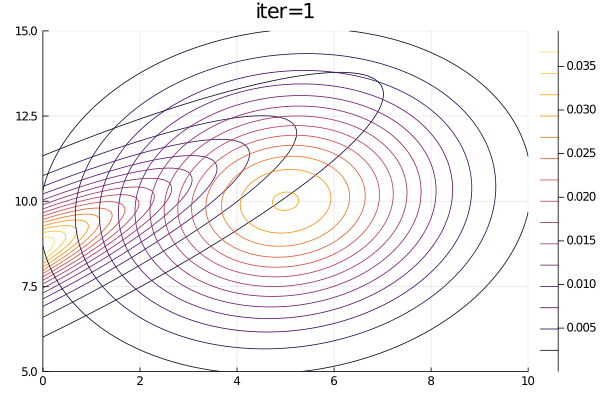

In [5]:
#hide_output

D=2

# 事前分布のハイパーパラメータ
m = [1., 1.]
beta = 1.
nu = 2. # >D-1である
W = [1. 0. ;0. 1.]

# ベイズ推論の進行過程をアニメーションに
animation = @animate for i = 1:100

    # ハイパーパラメータを更新
    beta_hat = i + beta
    m_hat = vec((sum(data[:, 1:i], dims=2) .+ beta .* m) ./ beta_hat)
    nu_hat = i + nu
    Sigma_xn_xn = sum([data[:,j]*data[:,j]' for j = 1:i])
    W_hat = Matrix(Hermitian(inv(Sigma_xn_xn .+ beta .* (m * m') .- beta_hat .* (m_hat * m_hat') .+ inv(W))))
    
    # 事後確率分布
    updated_Wishart = Wishart(nu_hat, W_hat)
    updated_Normal = MvNormal(m_hat,　beta_hat .* Matrix(Hermitian(inv(rand(updated_Wishart)))))
    
    # 予測分布のパラメータ
    mu_s = m_hat
    Lambda_s = ((1-D+nu_hat)*beta_hat/(1+beta_hat)) .* W_hat
    nu_s = 1 - D + nu_hat
    
    # 予測分布
    predict = MvTDist(nu_s, mu_s, inv(Lambda_s))

    # 描画用の関数
    x1 = 0. :0.1: 10.
    x2 = 5. :0.1: 15.
    
#     平均の事後分布 コードだけ
#     pdf_post(x, y) = pdf(updated_Normal, [x, y])
#     pdf_post.(x1,x2') == [pdf_post(x, y) for x in x1, y in x2 ]
#     p1 = contour(x1,x2,pdf_post.(x1,x2'))
    
    # 予測分布
    pdf_predict(x, y) = pdf(predict, [x, y])
    pdf_predict.(x1,x2') == [pdf_predict(x, y) for x in x1, y in x2]
    p2 = contour(x1,x2,pdf_predict.(x1,x2'))
    
    # 真の分布
    pdf_true(x, y) = pdf(MvNormal(mu_true, Sigma_true), [x, y])
    pdf_true.(x1,x2') == [pdf_true(x, y) for x in x1, y in x2]
    contour!(p2, x1,x2,pdf_true.(x1,x2'))
    plot(p2, title="iter=$i")
end;

gif(animation, "animations/mgauss_ml.gif", fps = 15)

![](animations/mgauss_ml.gif)

{{ '[須山敦志. 杉山将. ベイズ推論による機械学習入門. 講談社, 2017.](https://www.kspub.co.jp/book/detail/1538320.html)' | fndetail: 1 }}